In [83]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [84]:
batch_size = 1000
num_classes = 100
num_samples=10
epochs = 20

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
x_train shape: (50000, 1)
50000 train samples


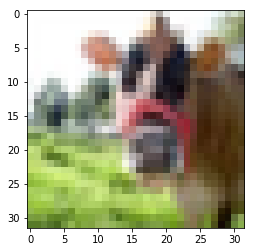

In [85]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

plt.imshow(x_train[0])
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('x_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')

In [86]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [87]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [88]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [90]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [91]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=no

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."
ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 3, 32, 32), kshp=(32, 3, 3, 3), filter_dilation=(1, 1), num_groups=1, unshared=False}(InplaceDimShuffle{0,3,1,2}.0, InplaceDimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\theano\gof\opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\nnet\opt.py", line 500, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d The

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against? On the CPU we do not support float16.

In [92]:
score= model.evaluate(x_test ,y_test, verbose=0)
print('test loss',score[0])
print('test accuracy',score[1])

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."
ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 3, 32, 32), kshp=(32, 3, 3, 3), filter_dilation=(1, 1), num_groups=1, unshared=False}(InplaceDimShuffle{0,3,1,2}.0, InplaceDimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\theano\gof\opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\nnet\opt.py", line 500, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d The

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against? On the CPU we do not support float16.